In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fire_df_nc_19 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2019.xlsx')
fire_df_nc_18 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2018.xlsx')
fire_df_nc_17 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2017.xlsx')
fire_df_nc_16 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2016.xlsx')
fire_df_nc_15 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2015.xlsx')
fire_df_nc_14 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2014.xlsx')

fire_df_sc_19 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2019.xlsx')
fire_df_sc_18 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2018.xlsx')
fire_df_sc_17 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2017.xlsx')
fire_df_sc_16 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2016.xlsx')
fire_df_sc_15 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2015.xlsx')
fire_df_sc_14 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2014.xlsx')

In [4]:
fires_df = pd.concat([fire_df_nc_14, fire_df_sc_14, 
                      fire_df_nc_15, fire_df_sc_15,
                      fire_df_nc_16, fire_df_sc_16,
                      fire_df_nc_17, fire_df_sc_17,
                      fire_df_nc_18, fire_df_sc_18, 
                      fire_df_nc_19, fire_df_sc_19])

In [5]:
fires_df.head(2)

,State-Unit,Incident Number,Incident Name,Incident Type,Start Date,IC Name,Team Type,Latitude,Longitude,Size,Unit of Measure,Costs,Anticipated Containment / Completion Date,Structures Destroyed
0,CA-LNU,CA-LNU-0005333,BUTTS,WF,07/01/2014 1405 CT,"DC, SCOTT UPTON, LNU-CALFIRE",Type 3 IC,39,123,3200.0,Acres,6500000.0,NaN,5
1,CA-AEU,CA-AEU-018237,SAND,WF,07/25/2014 1834 CT,"BC Mike Olivarria, AEU",Type 3 IC,39,121,4240.0,Acres,875500.0,08/02/2014 1400,67


In [6]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State-Unit                                 588 non-null    object 
 1   Incident Number                            588 non-null    object 
 2   Incident Name                              588 non-null    object 
 3   Incident Type                              588 non-null    object 
 4   Start Date                                 588 non-null    object 
 5   IC Name                                    587 non-null    object 
 6   Team Type                                  559 non-null    object 
 7   Latitude                                   588 non-null    int64  
 8   Longitude                                  588 non-null    int64  
 9   Size                                       588 non-null    float64
 10  Unit of Measure            

In [20]:
fires_df['start_date'] = pd.to_datetime(fires_df['Start Date'], utc=True)

/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname HST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [22]:
fires_df['year'] = fires_df['start_date'].dt.year

In [23]:
fires_df.head(2)

,State-Unit,Incident Number,Incident Name,Incident Type,Start Date,IC Name,Team Type,Latitude,Longitude,Size,Unit of Measure,Costs,Anticipated Containment / Completion Date,Structures Destroyed,start_date,year
0,CA-MNF,CA-MNF-000874,EEL,WF,07/31/2018 1521 PDT,Dale Shippelhoute - ICT3,Type 3 IC,40,123,972,Acres,1300000.0,08/08/2018 1200,10,2018-07-31 22:21:00+00:00,2018
1,CA-TGU,CA-TGU-009672,Sun,WF,10/07/2018 1245 PDT,Sun IC,Type 3 IC,40,122,3889,Acres,1500000.0,10/13/2018 1200,0,2018-10-07 19:45:00+00:00,2018


In [49]:
fires_df.groupby('year')['Costs'].sum()

year
2017    2.300000e+08
2018    1.370392e+09
2019    3.413502e+08
Name: Costs, dtype: float64

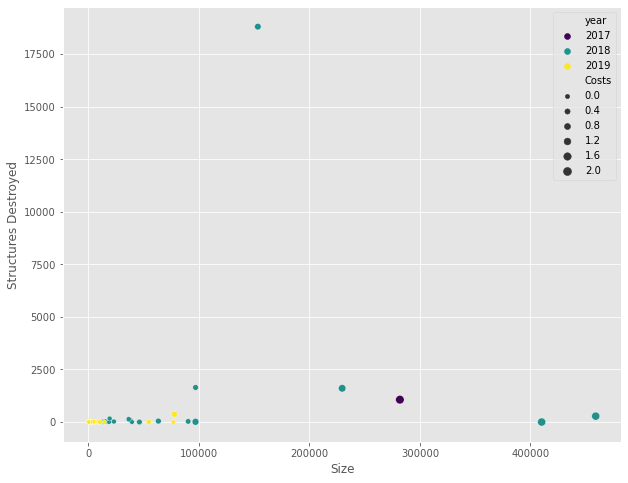

In [38]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

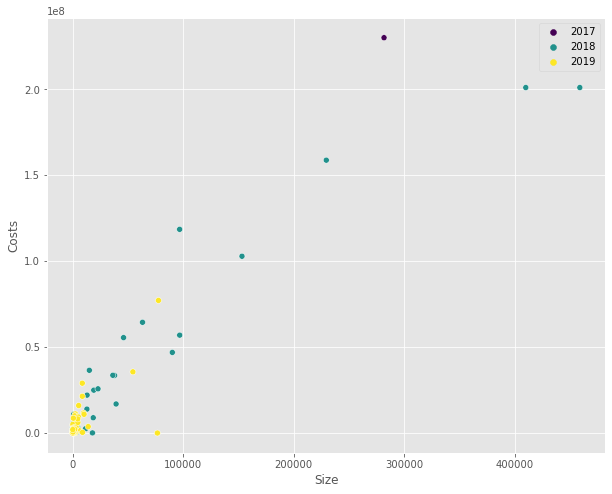

In [42]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

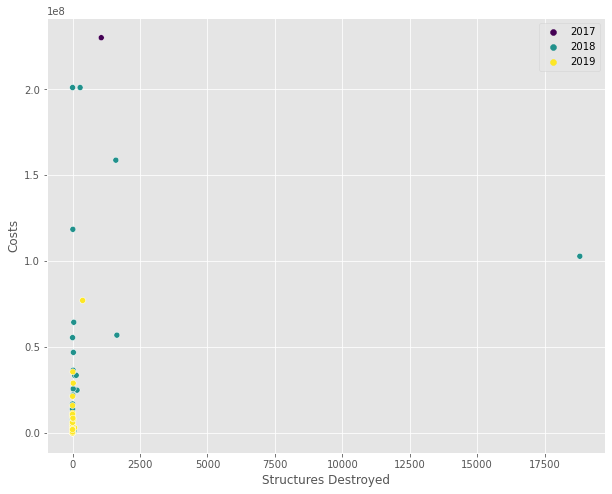

In [44]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');